In [67]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Creating regional lists
EUCA = 'Albania; Armenia; Azerbaijan; Belarus; Bosnia and Herzegovina; Bulgaria; Croatia; Georgia; Kazakhstan; Kyrgyzstan; Montenegro; Republic of Moldova; Romania; Russian Federation; Serbia; Tajikistan; Macedonia; Turkey; Turkmenistan; Ukraine; Uzbekistan'
EUCA = EUCA.replace(';', ',')
EUCA = EUCA.split(', ')

EAP = 'Australia; Brunei Darussalam; Cambodia; China; Cook Islands; Democratic People’s Republic of Korea; Fiji; Indonesia; Japan; Kiribati; Lao People’s Democratic Republic; Malaysia; Marshall Islands; Micronesia; Mongolia; Myanmar; Nauru; New Zealand; Niue; Palau; Papua New Guinea; Philippines; Republic of Korea; Samoa; Singapore; Solomon Islands; Thailand; Timor-Leste; Tokelau ; Tonga; Tuvalu; Vanuatu; Vietnam'
EAP = EAP.replace(';', ',')
EAP = EAP.split(', ')

SAS = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']

WEU = 'Andorra; Austria; Belgium; Cyprus; Czechia; Denmark; Estonia; Finland; France; Germany; Greece; Holy See; Hungary; Iceland; Ireland; Italy; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Netherlands; Norway; Poland; Portugal; San Marino; Slovakia; Slovenia; Spain; Sweden; Switzerland; United Kingdom'
WEU = WEU.replace(';', ',')
WEU = WEU.split(', ')

LAC = 'Anguilla; Antigua and Barbuda; Argentina; Bahamas; Barbados; Belize; Bolivia; Brazil; British Virgin Islands; Chile; Colombia; Costa Rica; Cuba; Dominica; Dominican Republic; Ecuador; El Salvador; Grenada; Guatemala; Guyana; Haiti; Honduras; Jamaica; Mexico; Montserrat; Nicaragua; Panama; Paraguay; Peru; Saint Kitts and Nevis; Saint Lucia; Saint Vincent and the Grenadines; Suriname; Trinidad and Tobago; Turks and Caicos Islands; Uruguay; Venezuela'
LAC = LAC.replace(';', ',')
LAC = LAC.split(', ')

MENA = 'Algeria; Bahrain; Egypt, Arab Rep.; Iran; Iraq; Israel; Jordan; Kuwait; Lebanon; Libya; Morocco; Oman; Qatar; Saudi Arabia; State of Palestine; Syrian Arab Republic; Tunisia; United Arab Emirates; Yemen'
MENA = MENA.replace(';', ',')
MENA = MENA.split(', ')

NA = ['Canada', 'United States']

ESAF = 'Angola; Botswana; Burundi; Comoros; Djibouti; Eritrea; Ethiopia; Kenya; Lesotho; Madagascar; Malawi; Mauritius; Mozambique; Namibia; Rwanda; Seychelles; Somalia; South Africa; South Sudan; Sudan; Swaziland; Uganda; United Republic of Tanzania; Zambia; Zimbabwe'
ESAF = ESAF.replace(';', ',')
ESAF = ESAF.split(', ')

WCAF = 'Benin; Burkina Faso; Cabo Verde; Cameroon; Central African Republic; Chad; Congo; Côte d’Ivoire; Democratic Republic of the Congo; Equatorial Guinea; Gabon; Gambia; Ghana; Guinea; Guinea-Bissau; Liberia; Mali; Mauritania; Niger; Nigeria; Sao Tome and Principe; Senegal; Sierra Leone; Togo'
WCAF = WCAF.replace(';', ',')
WCAF = WCAF.split(', ')

reg_list = ['EUCA', 'EAP', 'SAS', 'WEU', 'LAC', 'MENA', 'NA', 'ESAF', 'WCAF']

In [3]:
xls = pd.ExcelFile('data/elec_access_data2020.xls')
df1 = pd.read_excel(xls, 'Summary')
df2 = pd.read_excel(xls, 'Developing Asia')
df3 = pd.read_excel(xls, 'Africa')
df4 = pd.read_excel(xls, 'Central and South America')
df5 = pd.read_excel(xls, 'Middle East')
df3.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,"Source: IEA, World Energy Outlook-2020",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Electricity Access in Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,Proportion of the population with access to el...,NaN,NaN,NaN,NaN,NaN,NaN,Population without access (million)
4,NaN,NaN,NaN,National,NaN,NaN,NaN,NaN,Urban,Rural,NaN
5,NaN,NaN,NaN,2000,2005,2010,2015,2019,2019,2019,2019
6,NaN,NaN,Africa,0.355,0.395,0.437,0.492,0.557,0.808,0.368,579.2
7,NaN,NaN,North Africa,0.905,0.969,>99%,>99%,>99%,>99%,>99%,<1
8,NaN,NaN,Algeria,0.98,0.983,>99%,>99%,>99%,>99%,0.967,<1
9,NaN,NaN,Egypt,0.938,0.983,>99%,>99%,>99%,>99%,>99%,<1


In [4]:
df2.columns = range(df2.shape[1])
df2.columns = pd.to_datetime(df2.loc[5], format='%Y')
df2.columns = df2.columns.year
df2 = df2[7:]
df3.columns = range(df3.shape[1])
df3.columns = pd.to_datetime(df3.loc[5], format='%Y')
df3.columns = df3.columns.year
df3 = df3[7:]
df4.columns = range(df4.shape[1])
df4.columns = pd.to_datetime(df4.loc[5], format='%Y')
df4.columns = df4.columns.year
df4 = df4[7:]
df5.columns = range(df5.shape[1])
df5.columns = pd.to_datetime(df5.loc[5], format='%Y')
df5.columns = df5.columns.year
df5 = df5[7:]

In [5]:
# Combine all piecemeal data from IEA into one dataframe.
global_ae = pd.concat([df2, df3, df4, df5]).dropna(how='all', axis=1)

In [32]:
global_ae.columns = global_ae.columns.fillna('country')
global_ae = global_ae.replace('>99%', 1.)
global_ae = global_ae.iloc[:,:6].reset_index()
global_ae = global_ae.drop('index', axis=1)
global_ae.insert(6, 'region', np.nan)
global_ae

5,country,2000.0,2005.0,2010.0,2015.0,2019.0,region
0,China,0.986,1.0,1.0,1.000,1.000,NaN
1,India,0.43,0.577,0.679,0.789,1.000,NaN
2,Indonesia,0.534,0.561,0.672,0.883,1.000,NaN
3,Brunei,1.0,1.0,1.0,1.000,1.000,NaN
4,Cambodia,0.043,0.118,0.229,0.494,0.748,NaN
...,...,...,...,...,...,...,...
98,Saudi Arabia,0.977,0.972,0.99,1.000,1.000,NaN
99,Syria,0.859,0.905,0.927,0.930,0.923,NaN
100,Qatar,0.95,0.969,0.987,1.000,1.000,NaN
101,United Arab Emirates,0.96,0.935,1.0,1.000,1.000,NaN


In [33]:
global_ae.iloc[4]['region']
global_ae.at[13, 'region']
global_ae.loc[11]

5
country    Vietnam
2000.0       0.758
2005.0       0.947
2010.0       0.972
2015.0        0.99
2019.0         1.0
region         NaN
Name: 11, dtype: object

In [34]:
# Assigning each country to a region based on list fron UNICEF.
for index in range(global_ae.shape[0]):
    if global_ae.loc[index, 'country'] in EUCA:
        global_ae.loc[index, 'region'] = 'EUCA'
    elif global_ae.loc[index, 'country'] in EAP:
        global_ae.loc[index, 'region'] = 'EAP'
    elif global_ae.loc[index, 'country'] in SAS:
        global_ae.loc[index, 'region'] = 'SAS'
    elif global_ae.loc[index, 'country'] in WEU:
        global_ae.loc[index, 'region'] = 'WEU'    
    elif global_ae.loc[index, 'country'] in LAC:
        global_ae.loc[index, 'region'] = 'LAC'        
    elif global_ae.loc[index, 'country'] in MENA:
        global_ae.loc[index, 'region'] = 'MENA'    
    elif global_ae.loc[index, 'country'] in NA:
        global_ae.loc[index, 'region'] = 'NA'    
    elif global_ae.loc[index, 'country'] in ESAF:
        global_ae.loc[index, 'region'] = 'ESAF'
    elif global_ae.loc[index, 'country'] in WCAF:
        global_ae.loc[index, 'region'] = 'WCAF'    
    else: pass



# Classifying null regions for relevant countries
null_reg = global_ae[global_ae.region.isna()]
global_ae.loc[4,'region'] = 'EAP'
global_ae.loc[6,'region'] = 'EAP'
global_ae.loc[50,'region'] = 'WCAF'
global_ae.loc[55,'region'] = 'WCAF'
global_ae.loc[77,'region'] = 'ESAF'
global_ae.loc[78,'region'] = 'ESAF'
global_ae.loc[110,'region'] = 'MENA'

# Drop all other countries
global_ae = global_ae[global_ae.region.notna()]
global_ae

5,country,2000.0,2005.0,2010.0,2015.0,2019.0,region
0,China,0.986,1.0,1.0,1.000,1.000,EAP
1,India,0.43,0.577,0.679,0.789,1.000,SAS
2,Indonesia,0.534,0.561,0.672,0.883,1.000,EAP
4,Cambodia,0.043,0.118,0.229,0.494,0.748,EAP
6,Malaysia,0.969,0.981,1.0,1.000,1.000,EAP
...,...,...,...,...,...,...,...
98,Saudi Arabia,0.977,0.972,0.99,1.000,1.000,MENA
100,Qatar,0.95,0.969,0.987,1.000,1.000,MENA
101,United Arab Emirates,0.96,0.935,1.0,1.000,1.000,MENA
102,Yemen,0.5,0.369,0.396,0.460,0.465,MENA


In [36]:
import geonamescache
import geopandas

In [37]:
gc = geonamescache.GeonamesCache()
pd.DataFrame(gc.get_countries()).T
pd.DataFrame(gc.get_continents())

,AF,AS,EU,NA,OC,SA,AN
lng,21.09375,89.29688,9.14062,-100.54688,138.51562,-57.65625,16.40626
geonameId,6255146,6255147,6255148,6255149,6255151,6255150,6255152
timezone,"{'gmtOffset': 1, 'timeZoneId': 'Africa/Bangui'...","{'gmtOffset': 8, 'timeZoneId': 'Australia/Pert...","{'gmtOffset': 1, 'timeZoneId': 'Europe/Vaduz',...","{'gmtOffset': -7, 'timeZoneId': 'America/Cambr...","{'gmtOffset': 11, 'timeZoneId': 'Pacific/Pohnp...","{'gmtOffset': -3, 'timeZoneId': 'America/Recif...","{'gmtOffset': 3, 'timeZoneId': 'Antarctica/Syo..."
bbox,"{'east': 63.49390709700003, 'south': -37.43248...","{'east': -168.98974609375, 'south': -11.00214,...","{'east': 41.73303985595703, 'south': 27.637789...","{'east': -25.012222290039062, 'south': 5.49857...","{'east': 179.44752455997005, 'south': -47.2899...","{'east': -28.8360947061847, 'south': -56.53776...","{'east': 77.58521569100006, 'south': -49.72161..."
toponymName,Africa,Asia,Europe,North America,Oceania,South America,Antarctica
asciiName,Africa,Asia,Europe,North America,Oceania,South America,Antarctica
astergdem,589,5115,439,566,70,276,-9999
fcl,L,L,L,L,L,L,L
population,1031833000,3812366000,741000000,580000000,40000000,385742554,1100
wikipediaURL,en.wikipedia.org/wiki/Africa,en.wikipedia.org/wiki/Asia,en.wikipedia.org/wiki/Europe,en.wikipedia.org/wiki/North_America,en.wikipedia.org/wiki/Oceania,en.wikipedia.org/wiki/South_America,en.wikipedia.org/wiki/Antarctica


In [38]:
import ast
gc = geonamescache.GeonamesCache()
countries = pd.DataFrame(gc.get_countries()).T
continents = pd.DataFrame(gc.get_continents()).T

In [13]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

<AxesSubplot:>

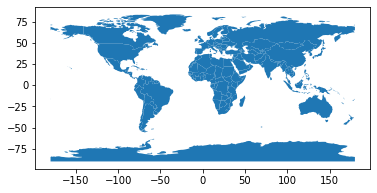

In [16]:
world
cities
world.plot()

<AxesSubplot:>

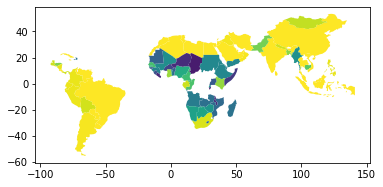

In [72]:
world
global_ae
world = world.rename(columns={'name':'country'})
world.country
new_world = pd.merge(world, global_ae, on='country', how='right')
new_world.plot(column=2019.0)

In [71]:
global_ae

5,country,2000.0,2005.0,2010.0,2015.0,2019.0,region
0,China,0.986,1.0,1.0,1.000,1.000,EAP
1,India,0.43,0.577,0.679,0.789,1.000,SAS
2,Indonesia,0.534,0.561,0.672,0.883,1.000,EAP
4,Cambodia,0.043,0.118,0.229,0.494,0.748,EAP
6,Malaysia,0.969,0.981,1.0,1.000,1.000,EAP
...,...,...,...,...,...,...,...
98,Saudi Arabia,0.977,0.972,0.99,1.000,1.000,MENA
100,Qatar,0.95,0.969,0.987,1.000,1.000,MENA
101,United Arab Emirates,0.96,0.935,1.0,1.000,1.000,MENA
102,Yemen,0.5,0.369,0.396,0.460,0.465,MENA


In [68]:
foo = pd.merge(world, global_ae, on='country', how='left')
foo[foo.region.isna()]
foo.plot()
plt.close('all')

In [58]:
global_ae[['country',2019.0]].sort_values(2019.0, ascending=False).head(40)

5,country,2019.0
0,China,1.000
91,Bahrain,1.000
100,Qatar,1.000
98,Saudi Arabia,1.000
96,Lebanon,1.000
95,Kuwait,1.000
94,Jordan,1.000
76,Cuba,1.000
92,Iran,1.000
90,Venezuela,1.000


In [56]:
global_ae

5,country,2000.0,2005.0,2010.0,2015.0,2019.0,region
0,China,0.986,1.0,1.0,1.000,1.000,EAP
1,India,0.43,0.577,0.679,0.789,1.000,SAS
2,Indonesia,0.534,0.561,0.672,0.883,1.000,EAP
4,Cambodia,0.043,0.118,0.229,0.494,0.748,EAP
6,Malaysia,0.969,0.981,1.0,1.000,1.000,EAP
...,...,...,...,...,...,...,...
98,Saudi Arabia,0.977,0.972,0.99,1.000,1.000,MENA
100,Qatar,0.95,0.969,0.987,1.000,1.000,MENA
101,United Arab Emirates,0.96,0.935,1.0,1.000,1.000,MENA
102,Yemen,0.5,0.369,0.396,0.460,0.465,MENA
